<a href="https://colab.research.google.com/github/Muskan-Y/Comment-Toxicity-in-Deep-Learning/blob/main/Comment_Toxicity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install nlp_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 4.1 MB/s eta 0:00:00


In [4]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.6 MB/s eta 0:00:00


In [5]:
from nltk.corpus.reader.wordnet import Lemma
import re
import nltk
import string
import nlp_utils
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

In [7]:
df=pd.read_csv('train.csv',engine='python', error_bad_lines=False)


Skipping line 2431: unexpected end of data


In [8]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2424,067d8ab342b30616,"Thanks Alan \nthanks for the intro to wiki, yo...",0,0,0,0,0,0
2425,067da093ddf19112,"== Oh, no, you needn't worry. Except for worki...",0,0,0,0,0,0
2426,067ecfe8efa28404,"""\n\nWhy would """"such a page be tagged for Wik...",0,0,0,0,0,0
2427,067f2536cce2235d,"""\n I am amazed to see that """"native speakers""...",0,0,0,0,0,0


import numpy as np
from google.colab import autoviz
df_7210804575976285477 = autoviz.get_registered_df('df_7210804575976285477')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7210804575976285477, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7626362893081186734 = autoviz.get_registered_df('df_7626362893081186734')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7626362893081186734, *['toxic'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8293437953655316442 = autoviz.get_registered_df('df_8293437953655316442')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8293437953655316442, *['severe_toxic'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5481801014719672377 = autoviz.get_registered_df('df_5481801014719672377')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5481801014719672377, *['obscene'], **{})
chart

import numpy as np
from google.colab import autoviz
df_365681692616748158 = autoviz.get_registered_df('df_365681692616748158')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_365681692616748158, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4762274663752667300 = autoviz.get_registered_df('df_4762274663752667300')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4762274663752667300, *['toxic'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7608881281235793538 = autoviz.get_registered_df('df_7608881281235793538')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7608881281235793538, *['severe_toxic'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6316556603970127964 = autoviz.get_registered_df('df_6316556603970127964')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6316556603970127964, *['obscene'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4417877731664639053 = autoviz.get_registered_df('df_4417877731664639053')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4417877731664639053, *[[['index', 'toxic'], ['toxic', 'severe_toxic'], ['severe_toxic', 'obscene'], ['obscene', 'threat']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_4007065447552777776 = autoviz.get_registered_df('df_4007065447552777776')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4007065447552777776, *['index', 'toxic', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_1971737232400619902 = autoviz.get_registered_df('df_1971737232400619902')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1971737232400619902, *['index', 'severe_toxic', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4041593689827610859 = autoviz.get_registered_df('df_4041593689827610859')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4041593689827610859, *['index', 'obscene', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_5851239763543736836 = autoviz.get_registered_df('df_5851239763543736836')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5851239763543736836, *['index', 'threat', None], **{})
chart

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             2429 non-null   object
 1   comment_text   2429 non-null   object
 2   toxic          2429 non-null   int64 
 3   severe_toxic   2429 non-null   int64 
 4   obscene        2429 non-null   int64 
 5   threat         2429 non-null   int64 
 6   insult         2429 non-null   int64 
 7   identity_hate  2429 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 151.9+ KB


In [10]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [11]:
df['toxic'].value_counts()

0    2182
1     247
Name: toxic, dtype: int64

In [12]:
df['severe_toxic'].value_counts()

0    2397
1      32
Name: severe_toxic, dtype: int64

In [13]:
df['obscene'].value_counts()

0    2297
1     132
Name: obscene, dtype: int64

In [14]:
df['threat'].value_counts()

0    2418
1      11
Name: threat, dtype: int64

In [15]:
df['insult'].value_counts()

0    2297
1     132
Name: insult, dtype: int64

In [16]:
df['identity_hate'].value_counts()

0    2402
1      27
Name: identity_hate, dtype: int64

**DATA VISUALIZATION**

In [17]:
sentencetype_graph=df.iloc[:,2:].sum()

In [18]:
sentencetype_graph

toxic            247
severe_toxic      32
obscene          132
threat            11
insult           132
identity_hate     27
dtype: int64

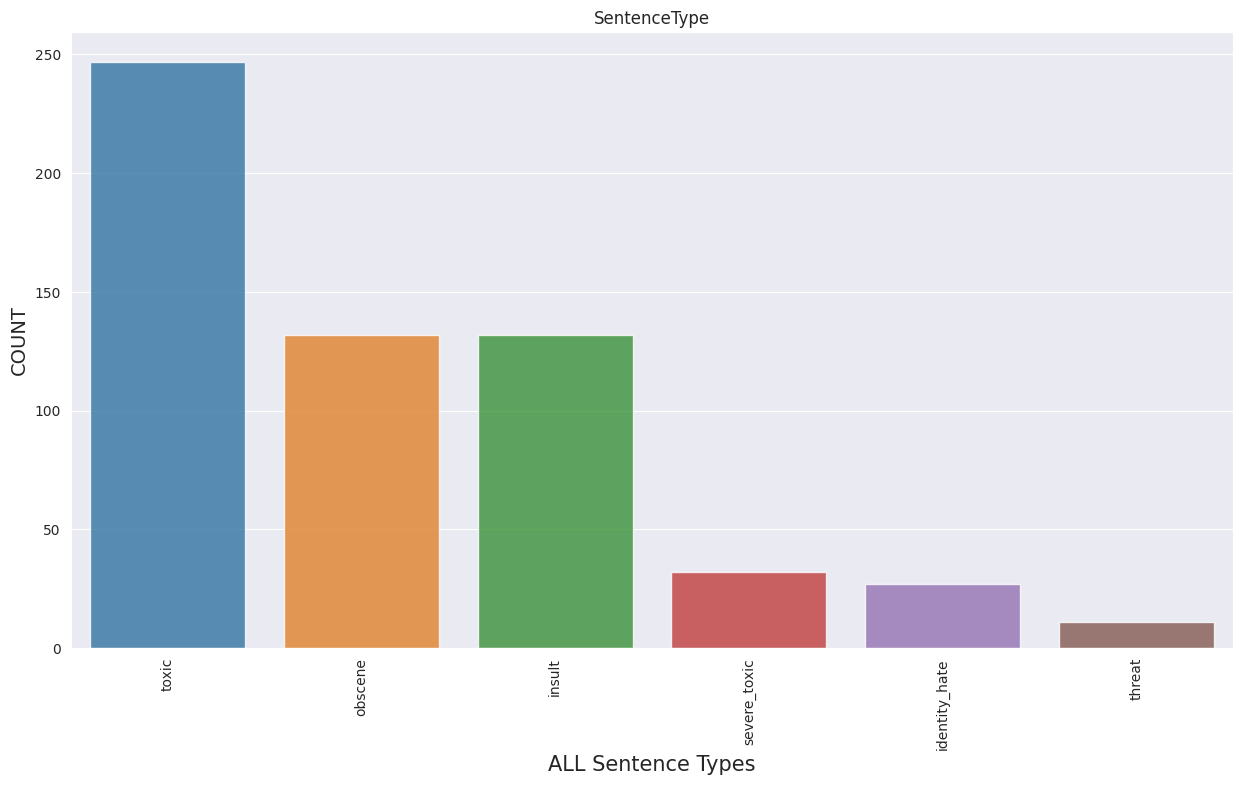

In [19]:
sns.set_style("darkgrid")
ls=sentencetype_graph.sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp=sns.barplot(x=ls.index, y=ls.values, alpha=0.8)
plt.title('SentenceType')
plt.ylabel('COUNT',fontsize=14)
plt.xlabel('ALL Sentence Types',fontsize=15)
temp.set_xticklabels(rotation=90,labels=ls.index,fontsize=10)
plt.show()

**PRE-PROCESSING**

In [20]:
df['comment_text'][10]

'"\nFair use rationale for Image:Wonju.jpg\n\nThanks for uploading Image:Wonju.jpg. I notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in Wikipedia articles constitutes fair use. In addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use.\n\nPlease go to the image description page and edit it to include a fair use rationale.\n\nIf you have uploaded other fair use media, consider checking that you have specified the fair use rationale on those pages too. You can find a list of \'image\' pages you have edited by clicking on the ""my contributions"" link (it is located at the very top of any Wikipedia page when you are logged in), and then selecting ""Image"" from the dropdown box. Note that any fair use images uploaded after 4 May, 2006, and lacking such a

In [21]:
import re
import string

In [22]:
alphanumeric = lambda x: re.sub('\w*\d\w*',' ',x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation),' ',x.lower())
remove_n = lambda x: re.sub("\n"," ",x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ',x)
df['comment_text'] = df['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [23]:
Insulting_comment_df=df.loc[:,['id','comment_text','insult']]

In [24]:
IdentityHate_comment_df=df.loc[:,['id','comment_text','identity_hate']]

In [25]:
Obscene_comment_df=df.loc[:,['id','comment_text','obscene']]

In [26]:
Threatening_comment_df=df.loc[:,['id','comment_text','threat']]

In [27]:
Severetoxic_comment_df=df.loc[:,['id','comment_text','severe_toxic']]

In [28]:
Toxic_comment_df=df.loc[:,['id','comment_text','toxic']]

**SUBSET DATASETS**

In [29]:
Severetoxic_comment_df

,id,comment_text,severe_toxic
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
2424,067d8ab342b30616,thanks alan thanks for the intro to wiki you...,0
2425,067da093ddf19112,oh no you needn t worry except for worki...,0
2426,067ecfe8efa28404,why would such a page be tagged for wikip...,0
2427,067f2536cce2235d,i am amazed to see that native speakers ...,0


import numpy as np
from google.colab import autoviz
df_6663934653225647349 = autoviz.get_registered_df('df_6663934653225647349')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6663934653225647349, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9219979091671019878 = autoviz.get_registered_df('df_9219979091671019878')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_9219979091671019878, *['severe_toxic'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4976905895658346036 = autoviz.get_registered_df('df_4976905895658346036')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4976905895658346036, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6669724981174705289 = autoviz.get_registered_df('df_6669724981174705289')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6669724981174705289, *['severe_toxic'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2810181839122521868 = autoviz.get_registered_df('df_2810181839122521868')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_2810181839122521868, *[[['index', 'severe_toxic']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_2152711307799716838 = autoviz.get_registered_df('df_2152711307799716838')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2152711307799716838, *['index', 'severe_toxic', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6221439001305769169 = autoviz.get_registered_df('df_6221439001305769169')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6221439001305769169, *['index', 'count()', None], **{})
chart

In [30]:
Obscene_comment_df

,id,comment_text,obscene
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
2424,067d8ab342b30616,thanks alan thanks for the intro to wiki you...,0
2425,067da093ddf19112,oh no you needn t worry except for worki...,0
2426,067ecfe8efa28404,why would such a page be tagged for wikip...,0
2427,067f2536cce2235d,i am amazed to see that native speakers ...,0


import numpy as np
from google.colab import autoviz
df_1137435492831626444 = autoviz.get_registered_df('df_1137435492831626444')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1137435492831626444, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8651145311142961989 = autoviz.get_registered_df('df_8651145311142961989')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8651145311142961989, *['obscene'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2261202622667860059 = autoviz.get_registered_df('df_2261202622667860059')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2261202622667860059, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8081515384124417438 = autoviz.get_registered_df('df_8081515384124417438')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8081515384124417438, *['obscene'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3099833543687351361 = autoviz.get_registered_df('df_3099833543687351361')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3099833543687351361, *[[['index', 'obscene']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_1214551770133493837 = autoviz.get_registered_df('df_1214551770133493837')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1214551770133493837, *['index', 'obscene', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_2587760851925633526 = autoviz.get_registered_df('df_2587760851925633526')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2587760851925633526, *['index', 'count()', None], **{})
chart

In [31]:
IdentityHate_comment_df

,id,comment_text,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
2424,067d8ab342b30616,thanks alan thanks for the intro to wiki you...,0
2425,067da093ddf19112,oh no you needn t worry except for worki...,0
2426,067ecfe8efa28404,why would such a page be tagged for wikip...,0
2427,067f2536cce2235d,i am amazed to see that native speakers ...,0


import numpy as np
from google.colab import autoviz
df_7323043993299252614 = autoviz.get_registered_df('df_7323043993299252614')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7323043993299252614, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3093793896795048127 = autoviz.get_registered_df('df_3093793896795048127')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3093793896795048127, *['identity_hate'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4855220184571512443 = autoviz.get_registered_df('df_4855220184571512443')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4855220184571512443, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7128080308439699540 = autoviz.get_registered_df('df_7128080308439699540')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7128080308439699540, *['identity_hate'], **{})
chart

import numpy as np
from google.colab import autoviz
df_179028587810066484 = autoviz.get_registered_df('df_179028587810066484')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_179028587810066484, *[[['index', 'identity_hate']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_6743849333630807753 = autoviz.get_registered_df('df_6743849333630807753')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6743849333630807753, *['index', 'identity_hate', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_245909897686475703 = autoviz.get_registered_df('df_245909897686475703')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_245909897686475703, *['index', 'count()', None], **{})
chart

In [32]:
Insulting_comment_df

,id,comment_text,insult
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
2424,067d8ab342b30616,thanks alan thanks for the intro to wiki you...,0
2425,067da093ddf19112,oh no you needn t worry except for worki...,0
2426,067ecfe8efa28404,why would such a page be tagged for wikip...,0
2427,067f2536cce2235d,i am amazed to see that native speakers ...,0


import numpy as np
from google.colab import autoviz
df_5458266580276719179 = autoviz.get_registered_df('df_5458266580276719179')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5458266580276719179, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3117462842450824557 = autoviz.get_registered_df('df_3117462842450824557')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3117462842450824557, *['insult'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1693073511762549510 = autoviz.get_registered_df('df_1693073511762549510')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1693073511762549510, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1992824985838411287 = autoviz.get_registered_df('df_1992824985838411287')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1992824985838411287, *['insult'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8175228829241821815 = autoviz.get_registered_df('df_8175228829241821815')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_8175228829241821815, *[[['index', 'insult']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_3768651488447787161 = autoviz.get_registered_df('df_3768651488447787161')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3768651488447787161, *['index', 'insult', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_8128636755295313923 = autoviz.get_registered_df('df_8128636755295313923')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8128636755295313923, *['index', 'count()', None], **{})
chart

In [33]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [34]:
def wordcloud(df,label):
  subset=df[df[label]==1]
  text=subset.comment_text.value
  wc=WordCloud(background_color="black",max_words=2000)

  wc.generate(" ".join(text))

  plt.figure(figsize=(20,20))
  plt.subplot(221)
  plt.axis("off")
  plt.title("Words frequented in {}".format(label),fontsize=20)
  plt.imshow(wc.recolor(colormap= 'gist_earth', random_state=244, alpha=0.98))

**BALANCING THE TARGET COLUMN**

In [35]:
Toxic_comment_balanced_1 = Toxic_comment_df[Toxic_comment_df['toxic'] == 1].iloc[0:5000,:]

In [37]:
Toxic_comment_balanced_0 = Toxic_comment_df[Toxic_comment_df['toxic'] == 0].iloc[0:5000,:]

In [38]:
Toxic_comment_balanced_1.shape

(247, 3)

In [39]:
Toxic_comment_balanced_0.shape

(2182, 3)

In [40]:
Toxic_comment_balanced_1['toxic'].value_counts()

1    247
Name: toxic, dtype: int64

In [41]:
Toxic_comment_balanced_0['toxic'].value_counts()

0    2182
Name: toxic, dtype: int64

In [42]:
Toxic_comment_balanced=pd.concat([Toxic_comment_balanced_1,Toxic_comment_balanced_0])

In [43]:
Toxic_comment_balanced['toxic'].value_counts()

0    2182
1     247
Name: toxic, dtype: int64

In [44]:
Severetoxic_comment_df['severe_toxic'].value_counts()

0    2397
1      32
Name: severe_toxic, dtype: int64

In [45]:
Severetoxic_comment_df_1 = Severetoxic_comment_df[Severetoxic_comment_df['severe_toxic'] == 1].iloc[0:1595,:]

In [46]:
Severetoxic_comment_df_0 = Severetoxic_comment_df[Severetoxic_comment_df['severe_toxic'] == 0].iloc[0:1595,:]

In [47]:
Severetoxic_comment_balanced=pd.concat([Severetoxic_comment_df_1,Severetoxic_comment_df_0])

In [48]:
Severetoxic_comment_balanced['severe_toxic'].value_counts()

0    1595
1      32
Name: severe_toxic, dtype: int64

In [49]:
Obscene_comment_df['obscene'].value_counts()

0    2297
1     132
Name: obscene, dtype: int64

In [50]:
Obscene_comment_df_1 = Obscene_comment_df[Obscene_comment_df['obscene'] == 1].iloc[0:5000,:]

In [51]:
Obscene_comment_df_0 = Obscene_comment_df[Obscene_comment_df['obscene'] == 0].iloc[0:5000,:]

In [52]:
Obscene_comment_balanced = pd.concat([Obscene_comment_df_1,Obscene_comment_df_0])

In [53]:
Obscene_comment_balanced['obscene'].value_counts()

0    2297
1     132
Name: obscene, dtype: int64

In [54]:
Threatening_comment_df

,id,comment_text,threat
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
2424,067d8ab342b30616,thanks alan thanks for the intro to wiki you...,0
2425,067da093ddf19112,oh no you needn t worry except for worki...,0
2426,067ecfe8efa28404,why would such a page be tagged for wikip...,0
2427,067f2536cce2235d,i am amazed to see that native speakers ...,0


import numpy as np
from google.colab import autoviz
df_2095150469698285520 = autoviz.get_registered_df('df_2095150469698285520')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2095150469698285520, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2552247351166170296 = autoviz.get_registered_df('df_2552247351166170296')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2552247351166170296, *['threat'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4949636471365138516 = autoviz.get_registered_df('df_4949636471365138516')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4949636471365138516, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7571185492843004096 = autoviz.get_registered_df('df_7571185492843004096')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7571185492843004096, *['threat'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5724946662856893020 = autoviz.get_registered_df('df_5724946662856893020')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_5724946662856893020, *[[['index', 'threat']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_3777139264624265059 = autoviz.get_registered_df('df_3777139264624265059')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3777139264624265059, *['index', 'threat', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6694040439739316091 = autoviz.get_registered_df('df_6694040439739316091')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6694040439739316091, *['index', 'count()', None], **{})
chart

In [56]:
Threatening_comment_df['threat'].value_counts()

0    2418
1      11
Name: threat, dtype: int64

In [57]:
Threatening_comment_df_1 = Threatening_comment_df[Threatening_comment_df['threat'] == 1].iloc[0:478,:]

In [58]:
Threatening_comment_df_0 = Threatening_comment_df[Threatening_comment_df['threat'] == 0].iloc[0:478,:]

In [59]:
Threatening_comment_balanced = pd.concat([Threatening_comment_df_1,Threatening_comment_df_0])

In [60]:
Threatening_comment_balanced['threat'].value_counts()

0    478
1     11
Name: threat, dtype: int64

In [61]:
Threatening_comment_balanced

,id,comment_text,threat
79,003217c3eb469ba9,hi i am back again last warning stop undoin...,1
176,006b94add72ed61c,i think that your a fagget get a oife and burn...,1
600,0199d6af27b715f3,i m also a sock puppet of this account supri...,1
802,02230885017a50c5,fuck you smith please have me notified when ...,1
1017,02c6e41e4b317ac3,wouldn t be the first time bitch fuck you i l...,1
...,...,...,...
475,01389dc7e054bfe5,hello if you re interested we could re...,0
476,013ad5246f4b953b,f k all rides at worlds of fun i hate all ...,0
477,013bd808a6d3d69b,as to job for you sure thing as soon as i ...,0
478,013c1a43411c5f9a,oh ok i just wanted to see what people though...,0


import numpy as np
from google.colab import autoviz
df_6876467161801873553 = autoviz.get_registered_df('df_6876467161801873553')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6876467161801873553, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4707826700045993584 = autoviz.get_registered_df('df_4707826700045993584')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4707826700045993584, *['threat'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7552651173928528378 = autoviz.get_registered_df('df_7552651173928528378')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7552651173928528378, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4618930592213511635 = autoviz.get_registered_df('df_4618930592213511635')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4618930592213511635, *['threat'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2591964678235779726 = autoviz.get_registered_df('df_2591964678235779726')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_2591964678235779726, *[[['index', 'threat']]], **{})
chart

In [63]:
Insulting_comment_df['insult'].value_counts()

0    2297
1     132
Name: insult, dtype: int64

0    2297
1     132
Name: insult, dtype: int64

In [64]:
Insulting_comment_df_1 = Insulting_comment_df[Insulting_comment_df['insult'] == 1].iloc[0:5000,:]

In [65]:
Insulting_comment_df_0 = Insulting_comment_df[Insulting_comment_df['insult'] == 0].iloc[0:5000,:]

In [66]:
Insulting_comment_balanced = pd.concat([Insulting_comment_df_1,Insulting_comment_df_0])

In [67]:
Insulting_comment_balanced['insult'].value_counts()

0    2297
1     132
Name: insult, dtype: int64

In [68]:
IdentityHate_comment_df['identity_hate'].value_counts()

0    2402
1      27
Name: identity_hate, dtype: int64

In [69]:
IdentityHate_comment_df_1 = IdentityHate_comment_df[IdentityHate_comment_df['identity_hate'] == 1].iloc[0:1405,:]

In [70]:
IdentityHate_comment_df_0 = IdentityHate_comment_df[IdentityHate_comment_df['identity_hate'] == 0].iloc[0:1405,:]

In [71]:
IdentityHate_comment_balanced = pd.concat([IdentityHate_comment_df_1,IdentityHate_comment_df_0])

In [72]:
IdentityHate_comment_balanced ['identity_hate'].value_counts()

0    1405
1      27
Name: identity_hate, dtype: int64

**MACHINE LEARNING** **-> MODEL BUILDING**

In [95]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk import ngrams,bigrams,trigrams

In [98]:
def cv_tf_train_test(dataframe,label,vectorizer,ngram):
  x = dataframe.comment_text
  y = dataframe[label]

  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=50)

  cv1 = vectorizer(ngram_range=(ngram), stop_words='english')

  x_train_cv1 = cv1.fit_transform(x_train)
  x_test_cv1 = cv1.transform(x_test)

  #Logistic Regression
  lr = LogisticRegression()
  lr.fit(x_train_cv1,y_train)

  knn = KNeighborsClassifier(n_neighbors=5)
  knn.fit(x_train_cv1, y_train)

  #Naive Bayes
  bnb = BernoulliNB()
  bnb.fit(x_train_cv1,y_train)

  #Multinomial naive bayes
  mnb = MultinomialNB()
  mnb.fit(x_train_cv1, y_train)

  #Support Vector Machine
  svm_model = LinearSVC()
  svm_model.fit(x_train_cv1, y_train)

  #Random Forest
  randomforest = RandomForestClassifier(n_estimators=100, random_state=50)
  randomforest.fit(x_train_cv1, y_train)

  f1_score_data = {'F1 Score':[f1_score(lr.predict(x_test_cv1),y_test),f1_score(knn.predict(x_test_cv1),y_test),
                               f1_score(bnb.predict(x_test_cv1), y_test),f1_score(mnb.predict(x_test_cv1), y_test),
                               f1_score(svm_model.predict(x_test_cv1), y_test), f1_score(randomforest.predict(x_test_cv1), y_test)]}

  df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN','BernoulliNB','MultinomialNB','SVM','Random Forest'])

  return df_f1

**EVALUATING MODEL'S PERFORMANCE USING METRICS**

In [99]:
# !pip install sklearn
from sklearn.model_selection import train_test_split
severe_toxic_comment_cv = cv_tf_train_test(Severetoxic_comment_balanced, 'severe_toxic', TfidfVectorizer, (1,1))
severe_toxic_comment_cv.rename(columns={'F1 Score': 'F1 Score(severe_toxic)'},inplace=True)
severe_toxic_comment_cv

,F1 Score(severe_toxic)
Log Regression,0.0
KNN,0.0
BernoulliNB,0.0
MultinomialNB,0.0
SVM,0.0
Random Forest,0.0


import numpy as np
from google.colab import autoviz
df_1869701358790801130 = autoviz.get_registered_df('df_1869701358790801130')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1869701358790801130, *['index'], **{})
chart

In [100]:
obscene_comment_cv = cv_tf_train_test(Obscene_comment_balanced, 'obscene', TfidfVectorizer, (1,1))
obscene_comment_cv.rename(columns={'F1 Score': 'F1 Score(obscene)'}, inplace=True)
obscene_comment_cv

,F1 Score(obscene)
Log Regression,0.156863
KNN,0.575758
BernoulliNB,0.039216
MultinomialNB,0.000000
SVM,0.637681
Random Forest,0.459016


import numpy as np
from google.colab import autoviz
df_31440834803075816 = autoviz.get_registered_df('df_31440834803075816')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_31440834803075816, *['F1 Score(obscene)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4596249275097976577 = autoviz.get_registered_df('df_4596249275097976577')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4596249275097976577, *['F1 Score(obscene)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8497396302096358441 = autoviz.get_registered_df('df_8497396302096358441')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8497396302096358441, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1224732186972169053 = autoviz.get_registered_df('df_1224732186972169053')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_1224732186972169053, *['F1 Score(obscene)', 'index'], **{'inner': 'stick'})
chart

In [101]:
threat_comment_cv = cv_tf_train_test(Threatening_comment_balanced, 'threat', TfidfVectorizer, (1,1))
threat_comment_cv.rename(columns={'F1 Score': 'F1 Score(threat)'},inplace=True)
threat_comment_cv

,F1 Score(threat)
Log Regression,0.000000
KNN,0.333333
BernoulliNB,0.000000
MultinomialNB,0.000000
SVM,0.000000
Random Forest,0.000000


import numpy as np
from google.colab import autoviz
df_5141498708612385445 = autoviz.get_registered_df('df_5141498708612385445')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5141498708612385445, *['F1 Score(threat)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3397961412220415485 = autoviz.get_registered_df('df_3397961412220415485')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3397961412220415485, *['F1 Score(threat)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1365866090295157353 = autoviz.get_registered_df('df_1365866090295157353')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1365866090295157353, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2724924867823822418 = autoviz.get_registered_df('df_2724924867823822418')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2724924867823822418, *['F1 Score(threat)', 'index'], **{'inner': 'stick'})
chart

In [102]:
insult_comment_cv = cv_tf_train_test(Insulting_comment_balanced, 'insult', TfidfVectorizer,(1,1))
insult_comment_cv.rename(columns={'F1 Score': 'F1 Score(insult)'},inplace=True)
insult_comment_cv

,F1 Score(insult)
Log Regression,0.080000
KNN,0.470588
BernoulliNB,0.000000
MultinomialNB,0.000000
SVM,0.507463
Random Forest,0.338983


import numpy as np
from google.colab import autoviz
df_2479859707335461018 = autoviz.get_registered_df('df_2479859707335461018')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2479859707335461018, *['F1 Score(insult)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_47129907287800687 = autoviz.get_registered_df('df_47129907287800687')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_47129907287800687, *['F1 Score(insult)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3129480359032737481 = autoviz.get_registered_df('df_3129480359032737481')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3129480359032737481, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7753170680364699498 = autoviz.get_registered_df('df_7753170680364699498')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7753170680364699498, *['F1 Score(insult)', 'index'], **{'inner': 'stick'})
chart

In [104]:
identity_comment_cv = cv_tf_train_test(Insulting_comment_balanced, 'insult', TfidfVectorizer, (1,1))
insult_comment_cv.rename(columns={'F1 Score': 'F1 Score(insult)'},inplace=True)
insult_comment_cv

,F1 Score(insult)
Log Regression,0.080000
KNN,0.470588
BernoulliNB,0.000000
MultinomialNB,0.000000
SVM,0.507463
Random Forest,0.338983


import numpy as np
from google.colab import autoviz
df_6399290805720820043 = autoviz.get_registered_df('df_6399290805720820043')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6399290805720820043, *['F1 Score(insult)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2660813167446631481 = autoviz.get_registered_df('df_2660813167446631481')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2660813167446631481, *['F1 Score(insult)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7943347728525268640 = autoviz.get_registered_df('df_7943347728525268640')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_7943347728525268640, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_760832694775806240 = autoviz.get_registered_df('df_760832694775806240')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_760832694775806240, *['F1 Score(insult)', 'index'], **{'inner': 'stick'})
chart

In [106]:
identity_hatecomment_cv = cv_tf_train_test(IdentityHate_comment_balanced, 'identity_hate', TfidfVectorizer, (1,1))
identity_hatecomment_cv.rename(columns={'F1 Score': 'F1 Score(identity_hate)'},inplace=True)
identity_hatecomment_cv

,F1 Score(identity_hate)
Log Regression,0.0
KNN,0.0
BernoulliNB,0.0
MultinomialNB,0.0
SVM,0.0
Random Forest,0.0


import numpy as np
from google.colab import autoviz
df_8281284094578104868 = autoviz.get_registered_df('df_8281284094578104868')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8281284094578104868, *['index'], **{})
chart

In [108]:
x = Toxic_comment_balanced.comment_text
y = Toxic_comment_balanced['toxic']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

x_train_fit = tfv.fit_transform(x_train)
x_test_fit = tfv.transform(x_test)
randomforest = RandomForestClassifier(n_estimators=100, random_state=50)

randomforest.fit(x_train_fit,y_train)
randomforest.predict(x_test_fit)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

**TESTING**

In [116]:
comment1 = ['You are a trash']
comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([0.09])

In [117]:
comment2 = ['He must be arrested']
comment2_vect = tfv.transform(comment2)
randomforest.predict_proba(comment2_vect)[:,1]
# above comment is 0.02 % toxic

array([0.02])

In [112]:
comment3 = ['Shutdown your channel']
comment3_vect = tfv.transform(comment3)
randomforest.predict_proba(comment3_vect)[:,1]

array([0.02])